## Libraries

In [5]:
import pandas as pd
import os
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from mpl_toolkits.basemap import Basemap
from wordcloud import WordCloud

## Loading dataset

In [6]:
def load_dataset(filename, chunk=100000):  
    temp_list = []  
    with pd.read_json(filename, lines=True, chunksize=chunk) as file:  
        for chunk in file:  
            temp_list.append(chunk)  
    return pd.concat(temp_list, ignore_index=True)  

business_df = load_dataset("Yelp JSON/yelp_dataset/yelp_academic_dataset_business.json")  
checkin_df = load_dataset("Yelp JSON/yelp_dataset/yelp_academic_dataset_checkin.json") 
review_df = load_dataset("Yelp JSON/yelp_dataset/yelp_academic_dataset_review.json") 
tip_df = load_dataset("Yelp JSON/yelp_dataset/yelp_academic_dataset_tip.json")   
user_df = load_dataset("Yelp JSON/yelp_dataset/yelp_academic_dataset_user.json")  


print("Business df:", business_df.shape)  
print("Review df:", review_df.shape)  
print("User df:", user_df.shape)
print("Checkin df:", checkin_df.shape)
print("Tip df:", tip_df.shape)


Business df: (150346, 14)
Review df: (6990280, 9)


## EDA

### summary statistics and viewing the data

In [8]:
print("Business Data:", business_df.info())
print("Review Data:", review_df.info())
print("User Data:", user_df.info())
print("Checkin Data:", checkin_df.info())
print("Tip Data:", tip_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   150346 non-null  object 
 1   name          150346 non-null  object 
 2   address       150346 non-null  object 
 3   city          150346 non-null  object 
 4   state         150346 non-null  object 
 5   postal_code   150346 non-null  object 
 6   latitude      150346 non-null  float64
 7   longitude     150346 non-null  float64
 8   stars         150346 non-null  float64
 9   review_count  150346 non-null  int64  
 10  is_open       150346 non-null  int64  
 11  attributes    136602 non-null  object 
 12  categories    150243 non-null  object 
 13  hours         127123 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 16.1+ MB
Business Data: None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6990280 entries, 0 to 6990279
Data columns (total 9 

In [46]:
print("Business df cols: ", business_df.columns)
print("Review df cols: ", review_df.columns)
print("User df cols: ", user_df.columns)
print("Checkin df cols: ", checkin_df.columns)
print("Tip df cols: ", tip_df.columns)

Business df cols:  Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours'],
      dtype='object')
Review df cols:  Index(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny',
       'cool', 'text', 'date'],
      dtype='object')
User df cols:  Index(['user_id', 'name', 'review_count', 'yelping_since', 'useful', 'funny',
       'cool', 'elite', 'friends', 'fans', 'average_stars', 'compliment_hot',
       'compliment_more', 'compliment_profile', 'compliment_cute',
       'compliment_list', 'compliment_note', 'compliment_plain',
       'compliment_cool', 'compliment_funny', 'compliment_writer',
       'compliment_photos', 'yelping_year'],
      dtype='object')
Checkin df cols:  Index(['business_id', 'date'], dtype='object')
Tip df cols:  Index(['user_id', 'business_id', 'text', 'date', 'compliment_count'], dtype='object')


In [47]:
user_df.head()

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,yelping_year
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,55,56,18,232,844,467,467,239,180,2007
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,184,157,251,1847,7054,3131,3131,1521,1946,2009
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,...,10,17,3,66,96,119,119,35,18,2008
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,...,1,6,2,12,16,26,26,10,9,2005
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,...,0,0,0,1,1,0,0,0,0,2007


In [7]:
business_df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [9]:
print("Business Data Summary:\n", business_df.describe())

Business Data Summary:
             latitude      longitude          stars   review_count  \
count  150346.000000  150346.000000  150346.000000  150346.000000   
mean       36.671150     -89.357339       3.596724      44.866561   
std         5.872759      14.918502       0.974421     121.120136   
min        27.555127    -120.095137       1.000000       5.000000   
25%        32.187293     -90.357810       3.000000       8.000000   
50%        38.777413     -86.121179       3.500000      15.000000   
75%        39.954036     -75.421542       4.500000      37.000000   
max        53.679197     -73.200457       5.000000    7568.000000   

            is_open  
count  150346.00000  
mean        0.79615  
std         0.40286  
min         0.00000  
25%         1.00000  
50%         1.00000  
75%         1.00000  
max         1.00000  


Finding missing values in Business data

In [10]:
print("Missing Values in Business Data:\n", business_df.isnull().sum())

Missing Values in Business Data:
 business_id         0
name                0
address             0
city                0
state               0
postal_code         0
latitude            0
longitude           0
stars               0
review_count        0
is_open             0
attributes      13744
categories        103
hours           23223
dtype: int64


## plots

We are more interested in finding which are the highest categories (count) in the business 

Text(0, 0.5, 'Count')

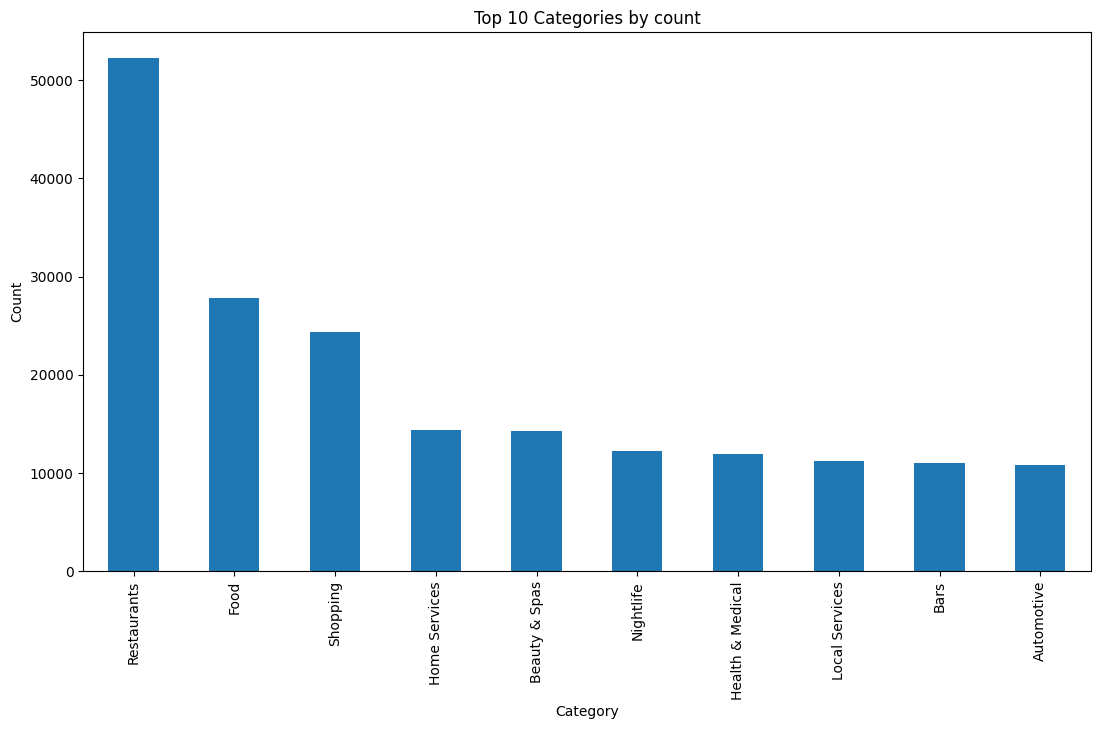

In [11]:
cat_counts = business_df['categories'].str.split(', ').explode().value_counts().head(10)
cat_counts.plot(kind='bar', figsize=(13,7))
plt.title("Top 10 Categories by count")
plt.xlabel("Category")
plt.ylabel("Count")

From the plot it can be inferred restaurants is the highest occuring category

In [12]:
restaurant_df = business_df[business_df['categories'].str.contains('Restaurants', case=False, na=False)]

restaurant_df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
5,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,TN,37015,36.269593,-87.058943,2.0,6,1,"{'BusinessParking': 'None', 'BusinessAcceptsCr...","Burgers, Fast Food, Sandwiches, Food, Ice Crea...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-22:0', '..."
8,k0hlBqXX-Bt0vf1op7Jr1w,Tsevi's Pub And Grill,8025 Mackenzie Rd,Affton,MO,63123,38.565165,-90.321087,3.0,19,0,"{'Caters': 'True', 'Alcohol': 'u'full_bar'', '...","Pubs, Restaurants, Italian, Bars, American (Tr...",None
9,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,2312 Dickerson Pike,Nashville,TN,37207,36.208102,-86.768170,1.5,10,1,"{'RestaurantsAttire': ''casual'', 'Restaurants...","Ice Cream & Frozen Yogurt, Fast Food, Burgers,...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-21:0', '..."
11,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,,Tampa Bay,FL,33602,27.955269,-82.456320,4.0,10,1,"{'Alcohol': ''none'', 'OutdoorSeating': 'None'...","Vietnamese, Food, Restaurants, Food Trucks","{'Monday': '11:0-14:0', 'Tuesday': '11:0-14:0'..."


finding the top 10 most reviewed restaurants

/var/folders/1g/xct9xb8j5n97jp4s5hq5c3580000gn/T/ipykernel_3541/484532361.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_10_restaurants['name'], x=top_10_restaurants['review_count'], palette='viridis')


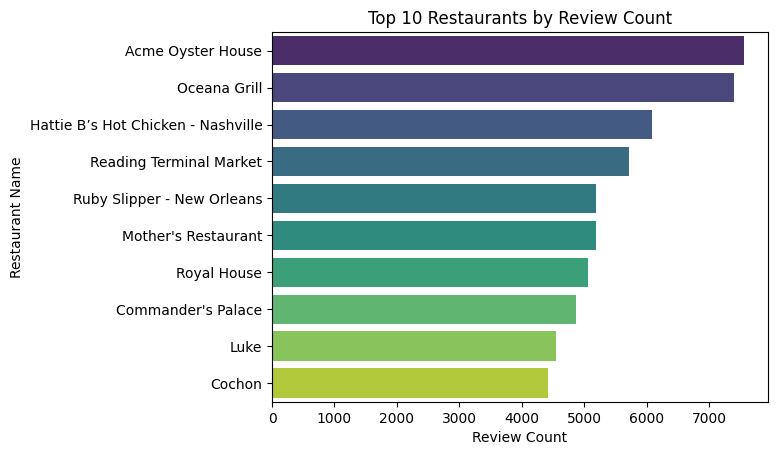

In [13]:
top_10_restaurants = restaurant_df.nlargest(10, 'review_count')
sns.barplot(y=top_10_restaurants['name'], x=top_10_restaurants['review_count'], palette='viridis')
plt.title("Top 10 Restaurants by Review Count")
plt.xlabel("Review Count")
plt.ylabel("Restaurant Name")

getting the exact count of reviews and their reatings

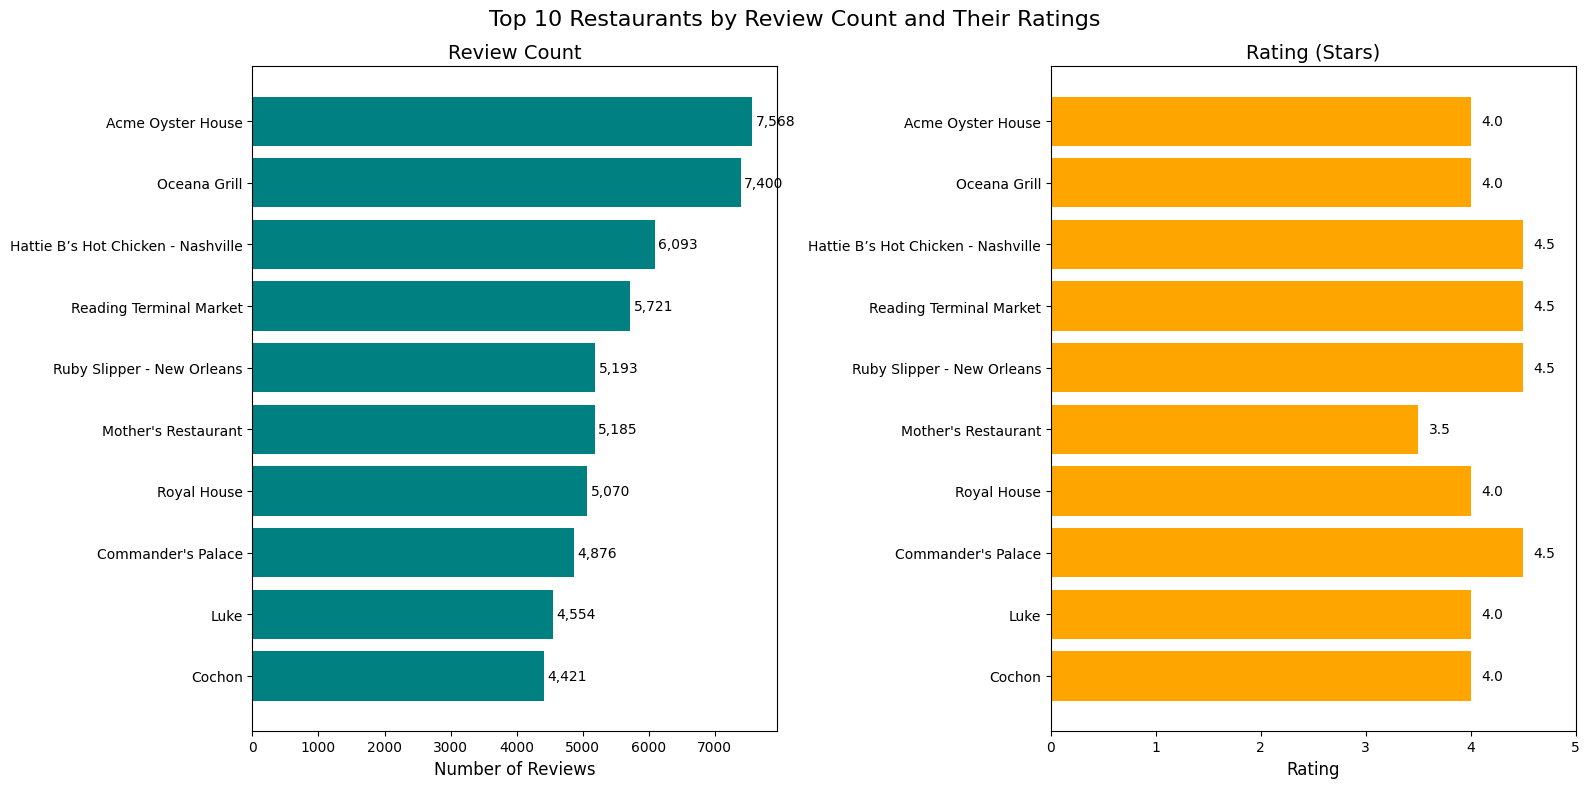

In [14]:
# Get top 10 restaurants by review count
top_10_restaurants = restaurant_df.nlargest(10, 'review_count')

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Plot review counts on the left subplot
bars1 = ax1.barh(top_10_restaurants['name'], top_10_restaurants['review_count'], color='teal')
ax1.set_title("Review Count", fontsize=14)
ax1.set_xlabel("Number of Reviews", fontsize=12)
ax1.set_ylabel("")
ax1.invert_yaxis()  # To match the order of restaurants in both plots

# Add value labels to the review count bars
for bar in bars1:
    width = bar.get_width()
    ax1.text(width + 50, bar.get_y() + bar.get_height()/2, 
             f'{int(width):,}', va='center')

# Plot ratings on the right subplot
bars2 = ax2.barh(top_10_restaurants['name'], top_10_restaurants['stars'], color='orange')
ax2.set_title("Rating (Stars)", fontsize=14)
ax2.set_xlabel("Rating", fontsize=12)
ax2.set_ylabel("")
ax2.set_xlim(0, 5)  # Assuming ratings are out of 5
ax2.invert_yaxis()  # To match the order of restaurants in both plots

# Add value labels to the rating bars
for bar in bars2:
    width = bar.get_width()
    ax2.text(width + 0.1, bar.get_y() + bar.get_height()/2, 
             f'{width:.1f}', va='center')

plt.suptitle("Top 10 Restaurants by Review Count and Their Ratings", fontsize=16)
plt.tight_layout()
plt.show()

where are these restaurants located?

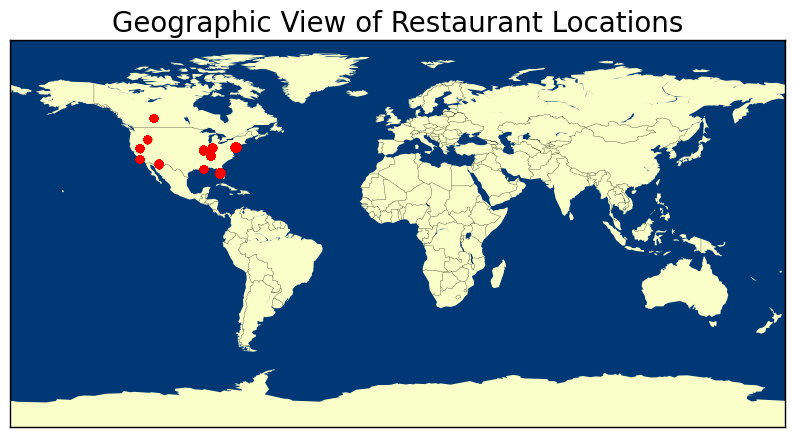

In [15]:
fig = plt.figure(figsize=(10, 6))
plt.title("Geographic View of Restaurant Locations",fontsize = 20)
m=Basemap(projection='cyl', lon_0 = 0, lat_0=0, resolution='c')
m.fillcontinents(color='#FAFFCA',lake_color='#003875')
m.drawmapboundary(fill_color='#003875') 
m.drawcountries(linewidth=0.2, color="black")
m_coords = m(restaurant_df["longitude"].tolist(), restaurant_df["latitude"].tolist())
m.scatter(m_coords[0], m_coords[1], s=5, c='red', lw=3, zorder=5);

magnifying the view on North America

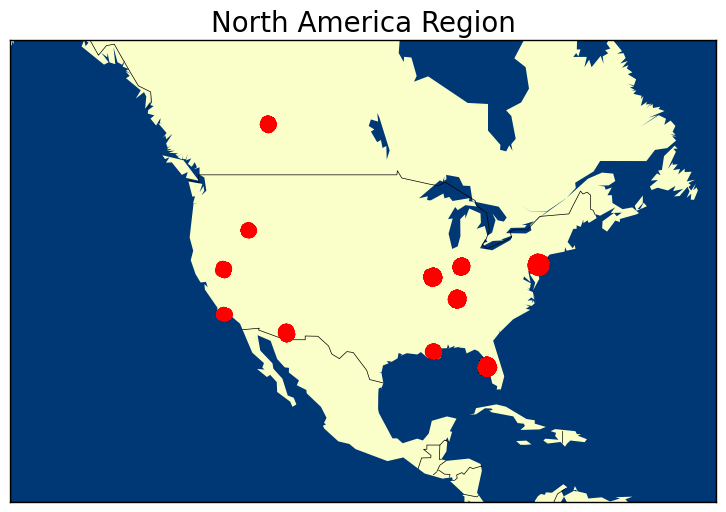

In [16]:
# coordinates range for North America
lon_min, lon_max = -150, -50
lat_min, lat_max = 10,60

plt.figure(figsize=(10,6))
m1 = Basemap(projection='merc', llcrnrlat=lat_min, urcrnrlat=lat_max,
             llcrnrlon=lon_min, urcrnrlon=lon_max, resolution='c')
plt.title("North America Region", fontsize = 20)
m1.fillcontinents(color='#FAFFCA',lake_color='#003875')
m1.drawmapboundary(fill_color='#003875')    
m1.drawcountries(linewidth=0.5, color="black") 
m1_coords = m1(restaurant_df["longitude"].tolist(), restaurant_df["latitude"].tolist())
m1.scatter(m1_coords[0], m1_coords[1], s=20, c="red", lw=5, zorder=5);

In [17]:
restaurant_df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
5,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,TN,37015,36.269593,-87.058943,2.0,6,1,"{'BusinessParking': 'None', 'BusinessAcceptsCr...","Burgers, Fast Food, Sandwiches, Food, Ice Crea...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-22:0', '..."
8,k0hlBqXX-Bt0vf1op7Jr1w,Tsevi's Pub And Grill,8025 Mackenzie Rd,Affton,MO,63123,38.565165,-90.321087,3.0,19,0,"{'Caters': 'True', 'Alcohol': 'u'full_bar'', '...","Pubs, Restaurants, Italian, Bars, American (Tr...",None
9,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,2312 Dickerson Pike,Nashville,TN,37207,36.208102,-86.768170,1.5,10,1,"{'RestaurantsAttire': ''casual'', 'Restaurants...","Ice Cream & Frozen Yogurt, Fast Food, Burgers,...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-21:0', '..."
11,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,,Tampa Bay,FL,33602,27.955269,-82.456320,4.0,10,1,"{'Alcohol': ''none'', 'OutdoorSeating': 'None'...","Vietnamese, Food, Restaurants, Food Trucks","{'Monday': '11:0-14:0', 'Tuesday': '11:0-14:0'..."


top 10 cities by number of restaurants

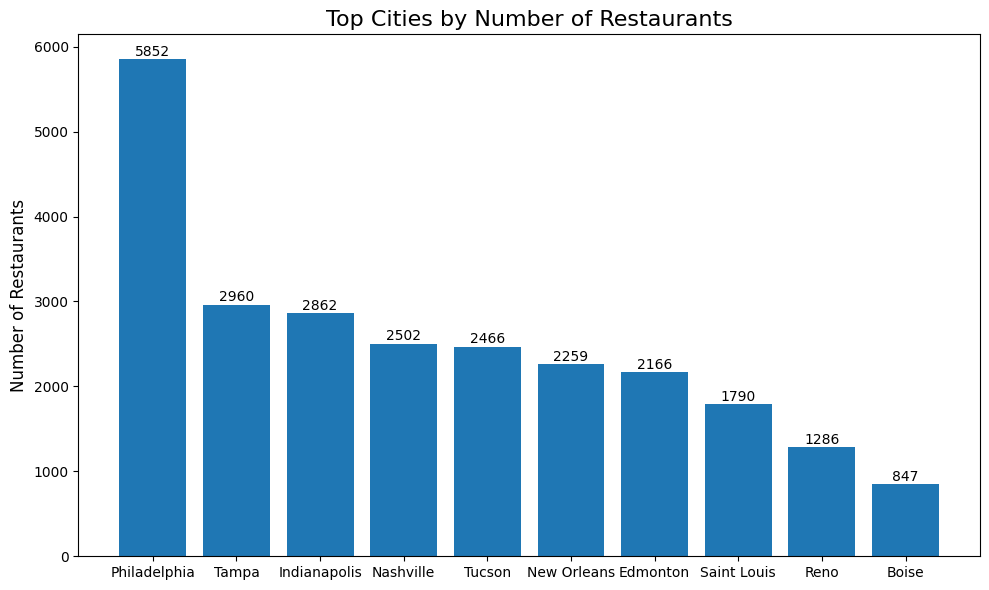

In [18]:
top_res_cities = restaurant_df.city.value_counts().nlargest(10)

plt.figure(figsize=(10, 6))
bars = plt.bar(top_res_cities.index, top_res_cities.values)
plt.title("Top Cities by Number of Restaurants", fontsize=16)
#plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of Restaurants', fontsize=12)
plt.tight_layout()

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 5, f'{height}', ha='center', va='bottom')

top 10 cities by highest reviews

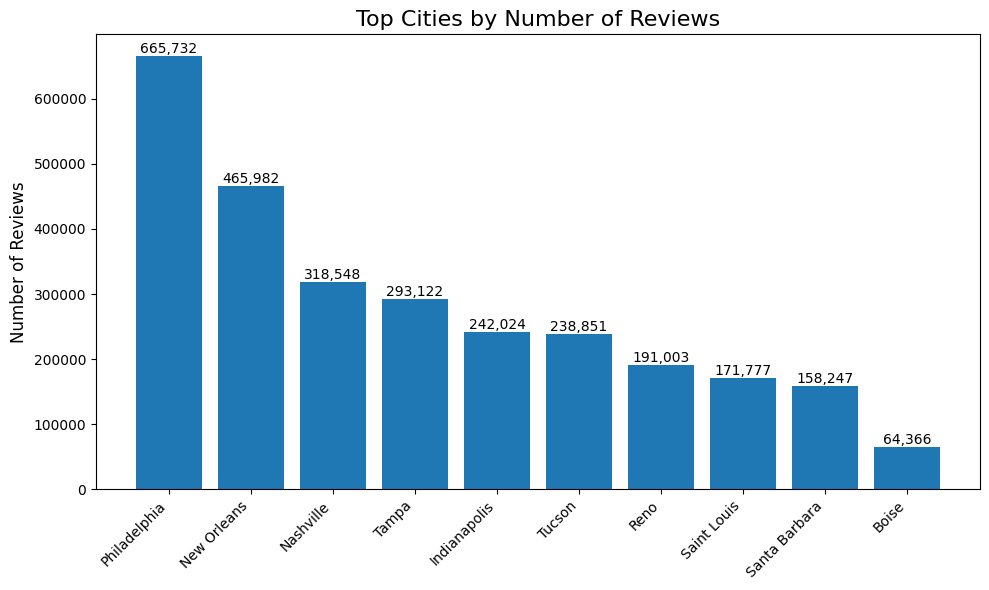

In [19]:
city_reviews = restaurant_df.groupby('city')['review_count'].sum()

top_review_cities = city_reviews.nlargest(10)

plt.figure(figsize=(10, 6))
bars = plt.bar(top_review_cities.index, top_review_cities.values)
plt.title("Top Cities by Number of Reviews", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of Reviews', fontsize=12)
plt.tight_layout()

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 5, 
             f'{int(height):,}', ha='center', va='bottom')

comparing the ratings of the Top 10 restaurants 

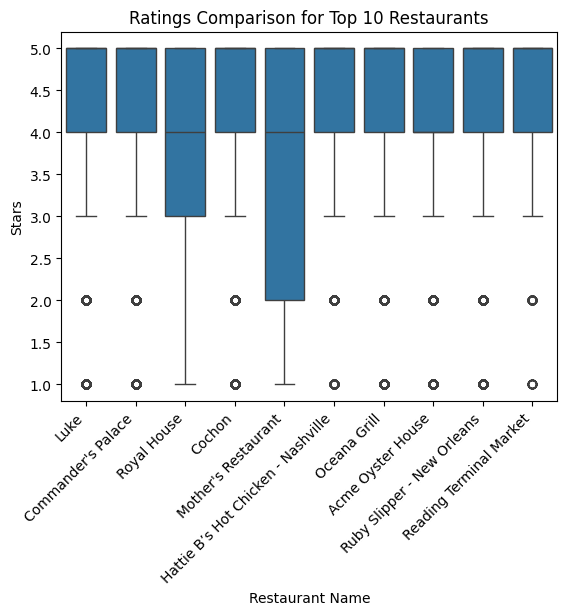

In [20]:
# Merge business names with reviews
review_with_names = review_df.merge(business_df[['business_id', 'name']], on='business_id', how='left')

# Plot Ratings Comparison for Top 10 Restaurants using business names
sns.boxplot(data=review_with_names[review_with_names['business_id'].isin(top_10_restaurants['business_id'])], 
            x='name', y='stars')
plt.title("Ratings Comparison for Top 10 Restaurants")
plt.xlabel("Restaurant Name")
plt.ylabel("Stars")
plt.xticks(rotation=45, ha='right')
plt.show()


/var/folders/1g/xct9xb8j5n97jp4s5hq5c3580000gn/T/ipykernel_3541/2651214255.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=most_reviewed_df, x='Business Name', y='Review Count', palette='coolwarm')


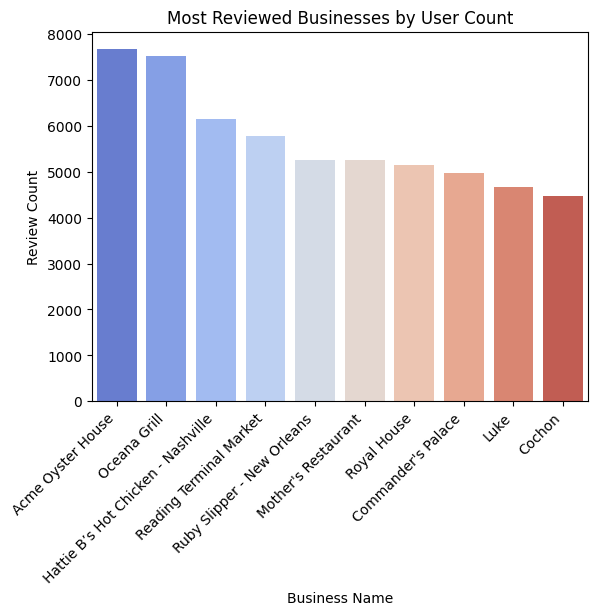

In [21]:
# 8. Most Reviewed Businesses by User Count
most_reviewed_businesses = review_df['business_id'].value_counts().head(10)  # Get top 10 reviewed businesses
business_names = business_df.set_index('business_id').loc[most_reviewed_businesses.index, 'name']  # Get business names

# Create a DataFrame for plotting
most_reviewed_df = pd.DataFrame({
    'Business Name': business_names.values,
    'Review Count': most_reviewed_businesses.values
})

# Plot the corrected chart
sns.barplot(data=most_reviewed_df, x='Business Name', y='Review Count', palette='coolwarm')
plt.title("Most Reviewed Businesses by User Count")
plt.xlabel("Business Name")
plt.ylabel("Review Count")
plt.xticks(rotation=45, ha='right')
plt.show()


/var/folders/1g/xct9xb8j5n97jp4s5hq5c3580000gn/T/ipykernel_3541/398168288.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_users_df, x='review_count', y='name', palette='magma')


<Axes: xlabel='review_count', ylabel='name'>

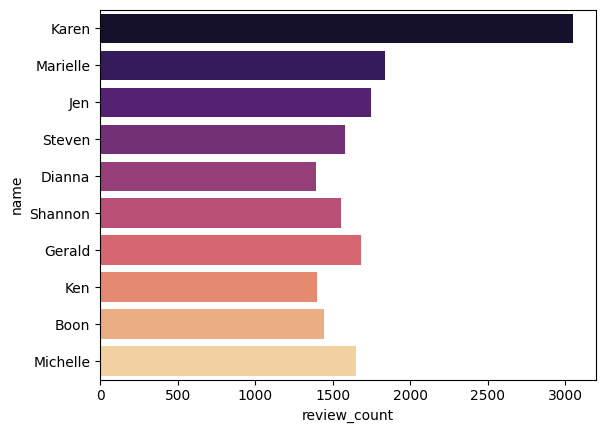

In [25]:
top_users = review_df['user_id'].value_counts().head(10)
top_users_df = user_df[user_df['user_id'].isin(top_users.index)][['user_id', 'name']].set_index('user_id')
top_users_df['review_count'] = top_users

sns.barplot(data=top_users_df, x='review_count', y='name', palette='magma')


In [45]:
tip_df['compliment_count'].value_counts()

compliment_count
0    898376
1      9821
2       617
3        82
4        14
5         3
6         2
Name: count, dtype: int64

/var/folders/1g/xct9xb8j5n97jp4s5hq5c3580000gn/T/ipykernel_3541/2610229794.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=user_compliments_df, x='compliment_count', y='name', palette='Blues_r')


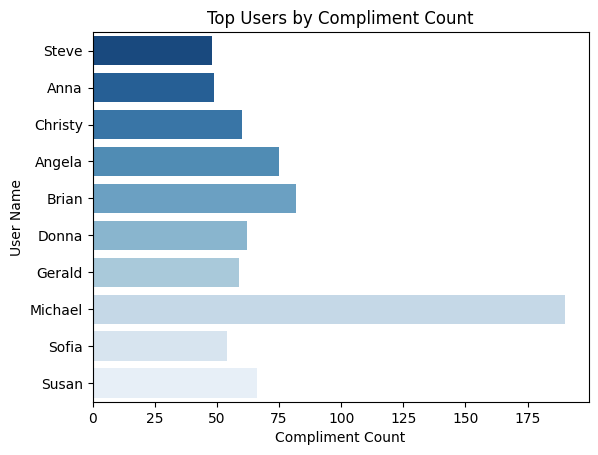

In [35]:
# User-wise Compliment Count (with User Names)
user_compliments = tip_df.groupby('user_id')['compliment_count'].sum()
user_compliments = user_compliments[user_compliments > 0].nlargest(10)  # Exclude zero and take top 10

# Look up user names
user_compliments_df = user_df[user_df['user_id'].isin(user_compliments.index)][['user_id', 'name']].set_index('user_id')
user_compliments_df['compliment_count'] = user_compliments

# Plot
sns.barplot(data=user_compliments_df, x='compliment_count', y='name', palette='Blues_r')
plt.title("Top Users by Compliment Count")
plt.xlabel("Compliment Count")
plt.ylabel("User Name")
plt.show()


/var/folders/1g/xct9xb8j5n97jp4s5hq5c3580000gn/T/ipykernel_3541/1794187227.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=business_compliments_df, x='compliment_count', y='name', palette='Reds_r')


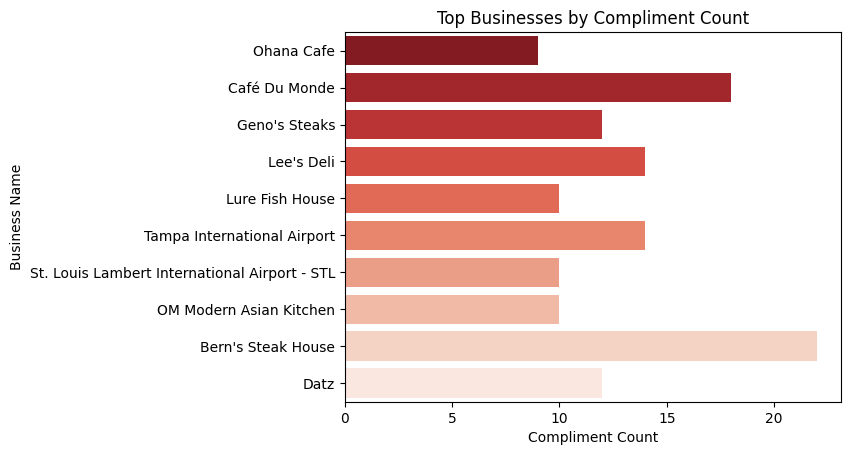

In [36]:
# Business-wise Compliment Count
business_compliments = tip_df.groupby('business_id')['compliment_count'].sum()
business_compliments = business_compliments[business_compliments > 0].nlargest(10)  # Exclude zero

# Look up business names
business_compliments_df = business_df[business_df['business_id'].isin(business_compliments.index)][['business_id', 'name']].set_index('business_id')
business_compliments_df['compliment_count'] = business_compliments

# Plot
sns.barplot(data=business_compliments_df, x='compliment_count', y='name', palette='Reds_r')
plt.title("Top Businesses by Compliment Count")
plt.xlabel("Compliment Count")
plt.ylabel("Business Name")
plt.show()

Text(0, 0.5, 'Number of Users')

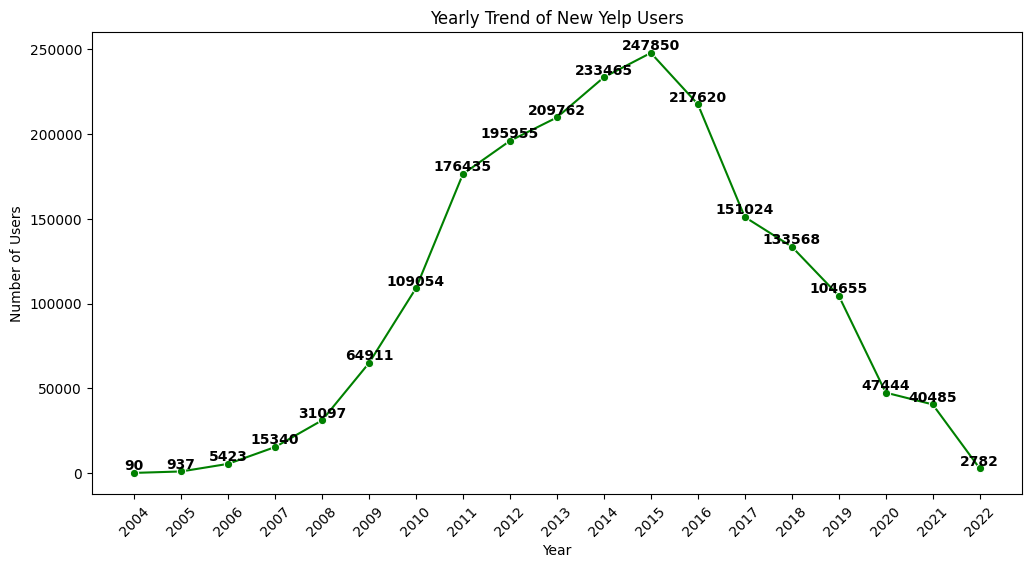

In [40]:
# Convert 'yelping_since' to datetime and extract the year
user_df['yelping_since'] = pd.to_datetime(user_df['yelping_since'])
yearly_users = user_df['yelping_since'].dt.year.value_counts().sort_index()

# Create the plot
plt.figure(figsize=(12, 6))
ax = sns.lineplot(x=yearly_users.index, y=yearly_users.values, marker='o', color='green')

# Set x-axis to display every year explicitly
plt.xticks(yearly_users.index, rotation=45)  # Ensure all years are displayed

# Annotate each point with count
for year, count in zip(yearly_users.index, yearly_users.values):
    plt.text(year, count, str(count), ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title("Yearly Trend of New Yelp Users")
plt.xlabel("Year")
plt.ylabel("Number of Users")


In [49]:
review_df.columns

Index(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny',
       'cool', 'text', 'date'],
      dtype='object')

## wordcloud

Text(0.5, 1.0, 'Word Cloud of User Names')

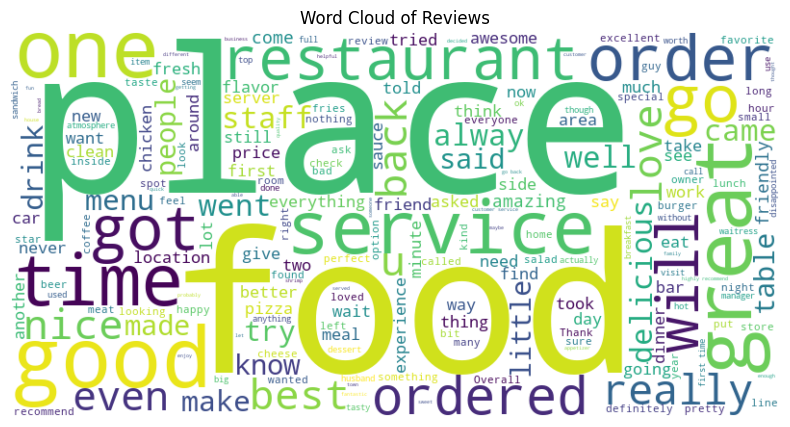

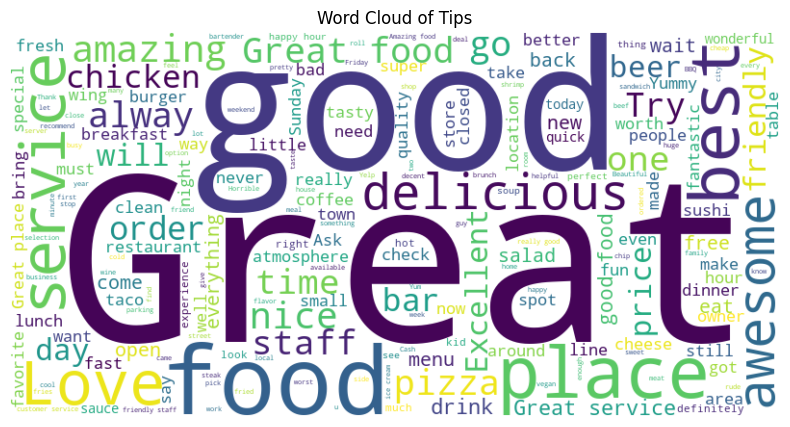

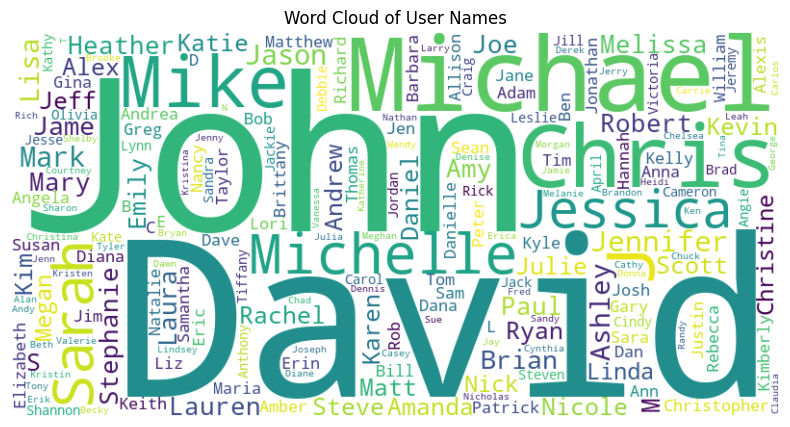

In [50]:
# Word Cloud for Reviews
text = " ".join(review_df['text'].dropna().sample(10000))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Reviews")

# Word Cloud for Tips
text = " ".join(tip_df['text'].dropna().sample(5000))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Tips")

# Word Cloud for User Reviews
text = " ".join(user_df['name'].dropna().sample(10000))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of User Names")

